In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('./data/LifeExpectancy.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<Axes: >

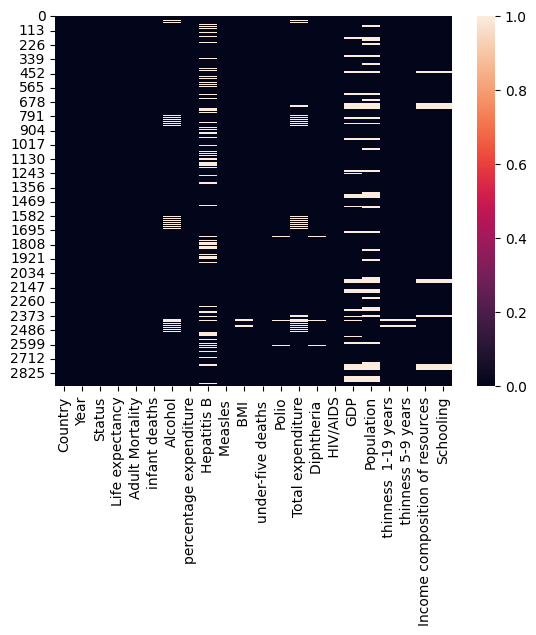

In [4]:
sns.heatmap(data.isnull())

<Axes: >

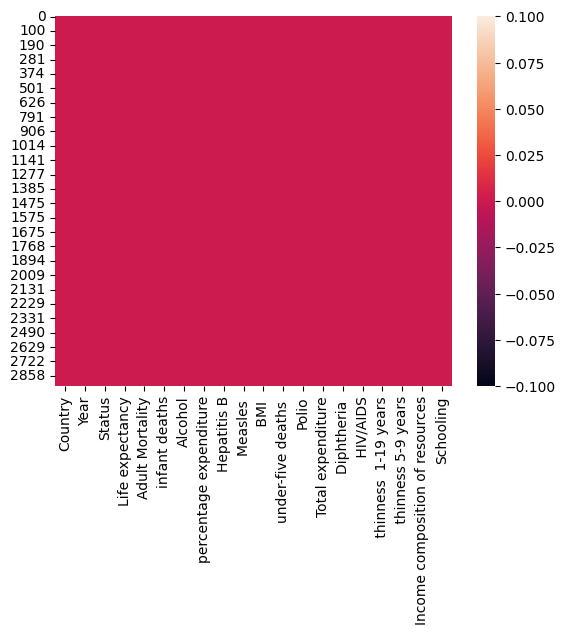

In [5]:
data = data.drop(columns=['GDP', 'Population'], axis=1)
data.dropna(inplace=True)
sns.heatmap(data.isnull())

In [6]:
country_name = input("What is your country: ").strip()
print(f"The country that you have chosen is: {country_name}")

selected = data[data["Country"] == country_name]

if selected.empty:
    print("Country not found in dataset.")
else:
    stats = {
        "Life expectancy": selected["Life expectancy"].mean(),
        "Infant deaths": selected["infant deaths"].mean(),
        "Hepatitis B": selected["Hepatitis B"].mean(),
        "BMI": selected[" BMI "].mean(),        # note the spaces in the column name
        "HIV/AIDS": selected[" HIV/AIDS"].mean() # note the leading space in the column name
    }

    print("\nAverages for", country_name)
    for name, value in stats.items():
        print(f"- {name:<15}: {value:.2f}")


The country that you have chosen is: Albania

Averages for Albania
- Life expectancy: 75.16
- Infant deaths  : 0.69
- Hepatitis B    : 98.00
- BMI            : 49.07
- HIV/AIDS       : 0.10


In [7]:
import plotly.graph_objects as go

fig = go.Figure()

#Traces

fig.add_trace(go.Scatter(
    x=list(selected.Year),
    y=list(selected['Life expectancy']),
    name = 'Life expectancy per year',
))

fig.add_trace(go.Scatter(
    x=list(selected.Year),
    y=list(selected['infant deaths']),
    name = 'Infant deaths per year',
))

fig.add_trace(go.Scatter(
    x=list(selected.Year),
    y=list(selected[' BMI ']),
    name = 'BMI per year',
))

fig.add_trace(go.Scatter(
    x=list(selected.Year),
    y=list(selected[' HIV/AIDS']),
    name = 'HIV/AIDS per year',
))

fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            direction = 'right',
            active = 0,
            x = 0.57,
            y = 1.2,
            buttons = list([
                dict(label = 'Life Expectancy',
                    method = 'update',
                    args = [{'visible': [True, False, False, False]},
                         {'title': 'Life Expectancy per year',}]),
                
                dict(label = 'Infant deaths',
                    method = 'update',
                    args = [{'visible': [False, True, False, False]},
                         {'title': 'Infants death per year',}]),
                
                dict(label = 'BMI',
                    method = 'update',
                    args = [{'visible': [False, False, True, False]},
                         {'title': 'BMI indicator per year',}]),
                
                dict(label = 'HIV/AIDS',
                    method = 'update',
                    args = [{'visible': [False, False, False, True]},
                         {'title': 'HIV/AIDS percentage per year',}])
        ])
    )
])

fig.show()